In [1]:
import os
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load pre-vectorized data
x_path = os.path.join("..","data", "X_tfidf_all.pkl")
X = joblib.load(x_path)

In [3]:
y_path = os.path.join("..","data", "y_all.pkl")
y = joblib.load(y_path)

In [5]:
# Split before SMOTE (only apply to training set!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1311
)

In [6]:
# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [7]:
# Train model (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [8]:
# Predict on test set
y_pred = model.predict(X_test)

In [9]:
# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.61      0.71      0.65     11413
     neutral       0.24      0.54      0.33      5951
    positive       0.96      0.81      0.88     61352

    accuracy                           0.78     78716
   macro avg       0.60      0.69      0.62     78716
weighted avg       0.85      0.78      0.80     78716



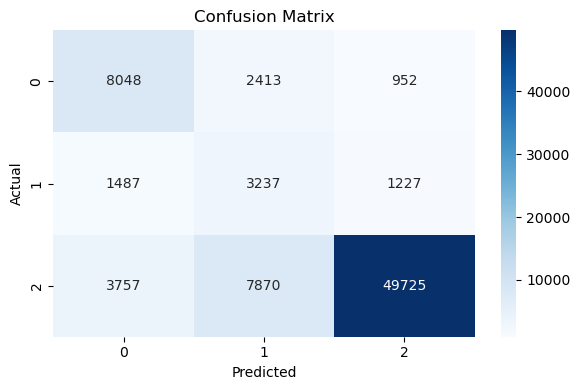

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix_smote_tfidf.png")
plt.show()

In [5]:
#1. Logistic Regression with class_weight='balanced' 

# Initialize and train the model
model_weighted = LogisticRegression(max_iter=1000, class_weight='balanced')
model_weighted.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [6]:
# Make predictions and evaluate
y_pred_weighted = model_weighted.predict(X_test)
print("=== Logistic Regression with class_weight='balanced' ===")
print(classification_report(y_test, y_pred_weighted))

=== Logistic Regression with class_weight='balanced' ===
              precision    recall  f1-score   support

    negative       0.61      0.71      0.65     11413
     neutral       0.23      0.57      0.33      5951
    positive       0.96      0.80      0.87     61352

    accuracy                           0.77     78716
   macro avg       0.60      0.69      0.62     78716
weighted avg       0.86      0.77      0.80     78716



In [7]:
# 2. Logistic Regression with SMOTE Oversampling

# Apply SMOTE to the training data
smote = SMOTE(random_state=1311)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [8]:
# Initialize and train the model
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000)

In [9]:
# Make predictions and evaluate
y_pred_smote = model_smote.predict(X_test)
print("\n=== Logistic Regression with SMOTE ===")
print(classification_report(y_test, y_pred_smote))


=== Logistic Regression with SMOTE ===
              precision    recall  f1-score   support

    negative       0.61      0.70      0.65     11413
     neutral       0.24      0.55      0.33      5951
    positive       0.96      0.81      0.88     61352

    accuracy                           0.78     78716
   macro avg       0.60      0.69      0.62     78716
weighted avg       0.85      0.78      0.80     78716

